In [1]:
import pandas as pd
from utils import db_connect

In [2]:
engine = db_connect()

df_complete = pd.read_sql("ml_4geeks_airbnb_ny_2019", engine)

#### Exploration and Data Cleaning

In [3]:
# Get dimensions of the dataframe
df_complete.shape

(48895, 16)

In [4]:
# Obtain information about data types and non-null values
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

- There are 48895 rows and 16 columns
- The data has 10 numerical and 6 categorical characteristics
- the columns last_review and reviews per month have 21% null values
- name and host_name also have null values, but significantly less

#### Eliminate duplicates

In [11]:
print(df_complete.id.duplicated().sum())
print(df_complete.name.duplicated().sum())
print(df_complete.host_id.duplicated().sum())
print(df_complete.host_name.duplicated().sum())

0
989
11438
37442


In [13]:
df_complete.name.value_counts()

name
Hillside Hotel                                        18
Home away from home                                   17
New york Multi-unit building                          16
Brooklyn Apartment                                    12
Loft Suite @ The Box House Hotel                      11
                                                      ..
Large 1BR Apt. in Williamsburg                         1
Feel at Home                                           1
Spacious Modern Alcove Studio in a Luxury Building     1
Artist's Room in Large Apartment                       1
Trendy duplex in the very heart of Hell's Kitchen      1
Name: count, Length: 47905, dtype: int64

In [14]:
df_complete.host_name.value_counts()

host_name
Michael              417
David                403
Sonder (NYC)         327
John                 294
Alex                 279
                    ... 
Rhonycs                1
Brandy-Courtney        1
Shanthony              1
Aurore And Jamila      1
Ilgar & Aysel          1
Name: count, Length: 11452, dtype: int64

In [15]:
df_complete.host_id.value_counts()

host_id
219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
            ... 
23727216       1
89211125       1
19928013       1
1017772        1
68119814       1
Name: count, Length: 37457, dtype: int64

In [16]:
data_clean = df_complete.drop(["id", 'name', 'host_name', "last_review", "reviews_per_month"], axis=1)

In [18]:
data_clean = data_clean[data_clean.availability_365 > 0]

In [19]:
data_clean

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
5,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,1,129
...,...,...,...,...,...,...,...,...,...,...,...
48890,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2,9
48891,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2,36
48892,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,1,27
48893,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,6,2


#### Analysis on Categorical Variables

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

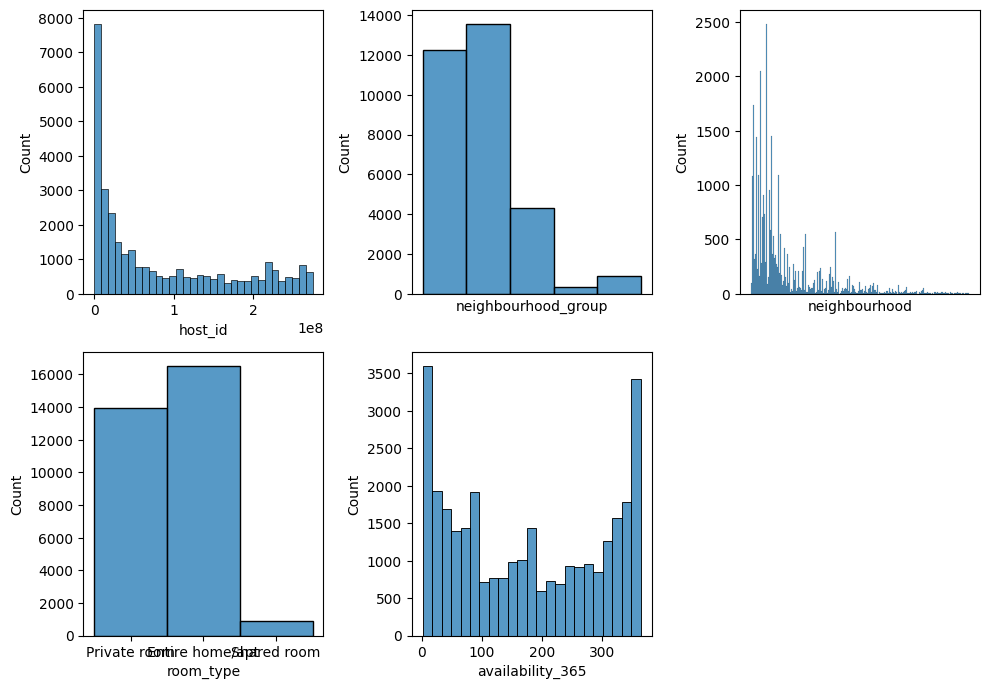

In [33]:
fig, axis = plt.subplots(2, 3, figsize=(10, 7))

# Create histograms for each variable
sns.histplot(ax = axis[0,0], data = data_clean, x = "host_id")
sns.histplot(ax = axis[0,1], data = data_clean, x = "neighbourhood_group").set_xticks([])
sns.histplot(ax = axis[0,2], data = data_clean, x = "neighbourhood").set_xticks([])
sns.histplot(ax = axis[1,0], data = data_clean, x = "room_type")
sns.histplot(ax = axis[1,1], data = data_clean, x = "availability_365")
fig.delaxes(axis[1, 2])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
